In [1]:
import numpy as np
import matplotlib.pyplot as plt
from worldModels import *
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import scipy.optimize
import scipy.io
import os.path
from utils import *
from run_simulations import *
from agents import *

%matplotlib notebook
%reload_ext autoreload
%autoreload 2


import autograd.numpy as np
import autograd.numpy.random as npr
npr.seed(0)

import ssm
from ssm.util import find_permutation
from ssm.plots import gradient_cmap, white_to_color_cmap

In [9]:
world = ForagingWorld(prew=0.9, psw=0.1, pstruct=[5, 100], nblockmax=1000)
# world, ntrials = make_switching_world(rlow, rhigh, nblocks, ntrials_per_block[0], ntrials_per_block[1])
agent = ValueAccumulationAgent(gamma=0.4, beta=10)
# agent = EGreedyQLearningAgent(gamma=0.1, eps=0.1)
exp = Experiment(agent, world)
exp.run()  

choicelst = split_by_trials(agent.choice_history, world.ntrialblocks, chop='none')
arr = choicelst[0]
#get_num_rewards_trailing_block(world, agent)
z_states = get_zstates(agent)


<IPython.core.display.Javascript object>


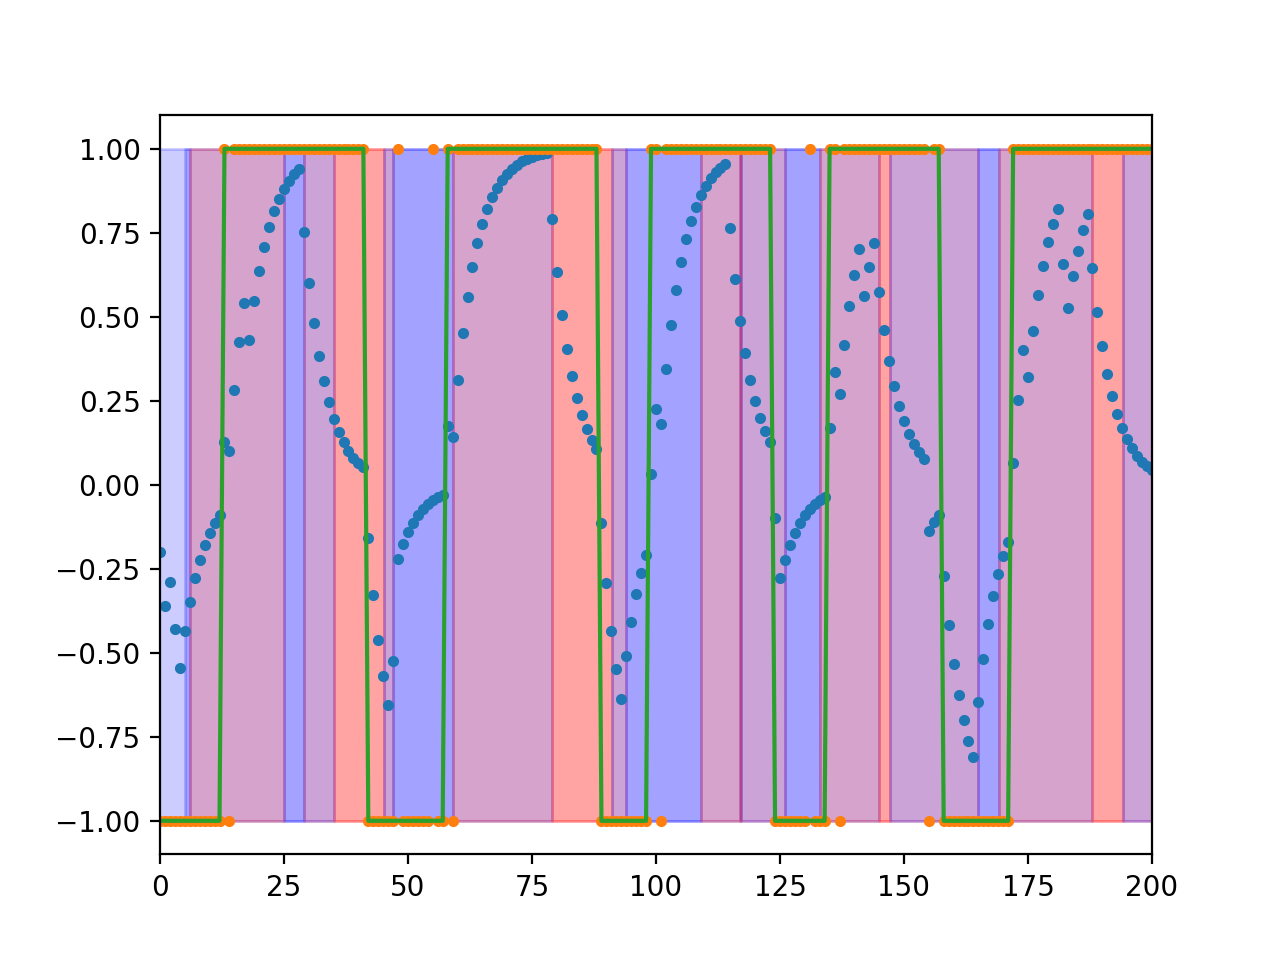

(0.0, 200.0)

In [3]:
plt.figure()
plt.plot(agent.find_prob(), '.')
plt.plot(np.array(agent.choice_history) * 2 - 1, '.')
plt.plot(z_states * 2 - 1)

blockswitches = np.cumsum(world.ntrialblocks)
for i in range(len(world.ntrialblocks) - 1):
    if i % 2:
        plt.fill_between([blockswitches[i], blockswitches[i+1]], [-1,-1], [1, 1], color='r', alpha=0.2)
    else:
        plt.fill_between([blockswitches[i], blockswitches[i+1]], [-1,-1], [1, 1], color='b', alpha=0.2)
        
plt.xlim([0, 200])


<IPython.core.display.Javascript object>


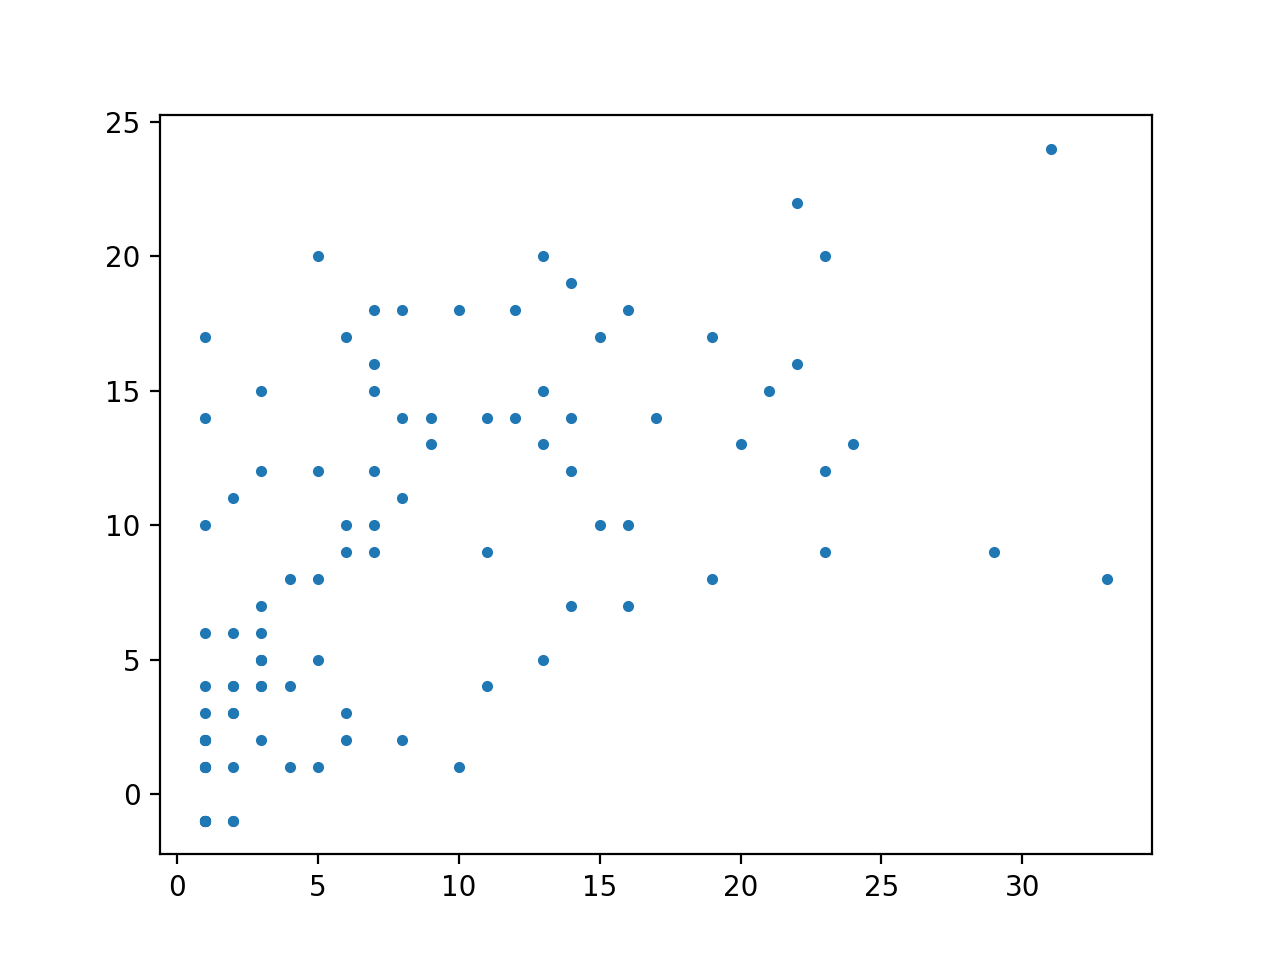

In [24]:
# Correlations based on number of rewards and errors (simple counting)
Nerrors = get_num_errors_leading_block(world, agent)
Nrews = get_num_rewards_trailing_block(world, agent)
# plt.plot(lst)
plt.figure()
plt.plot(Nrews[:-1], Nerrors[1:], '.')

<IPython.core.display.Javascript object>


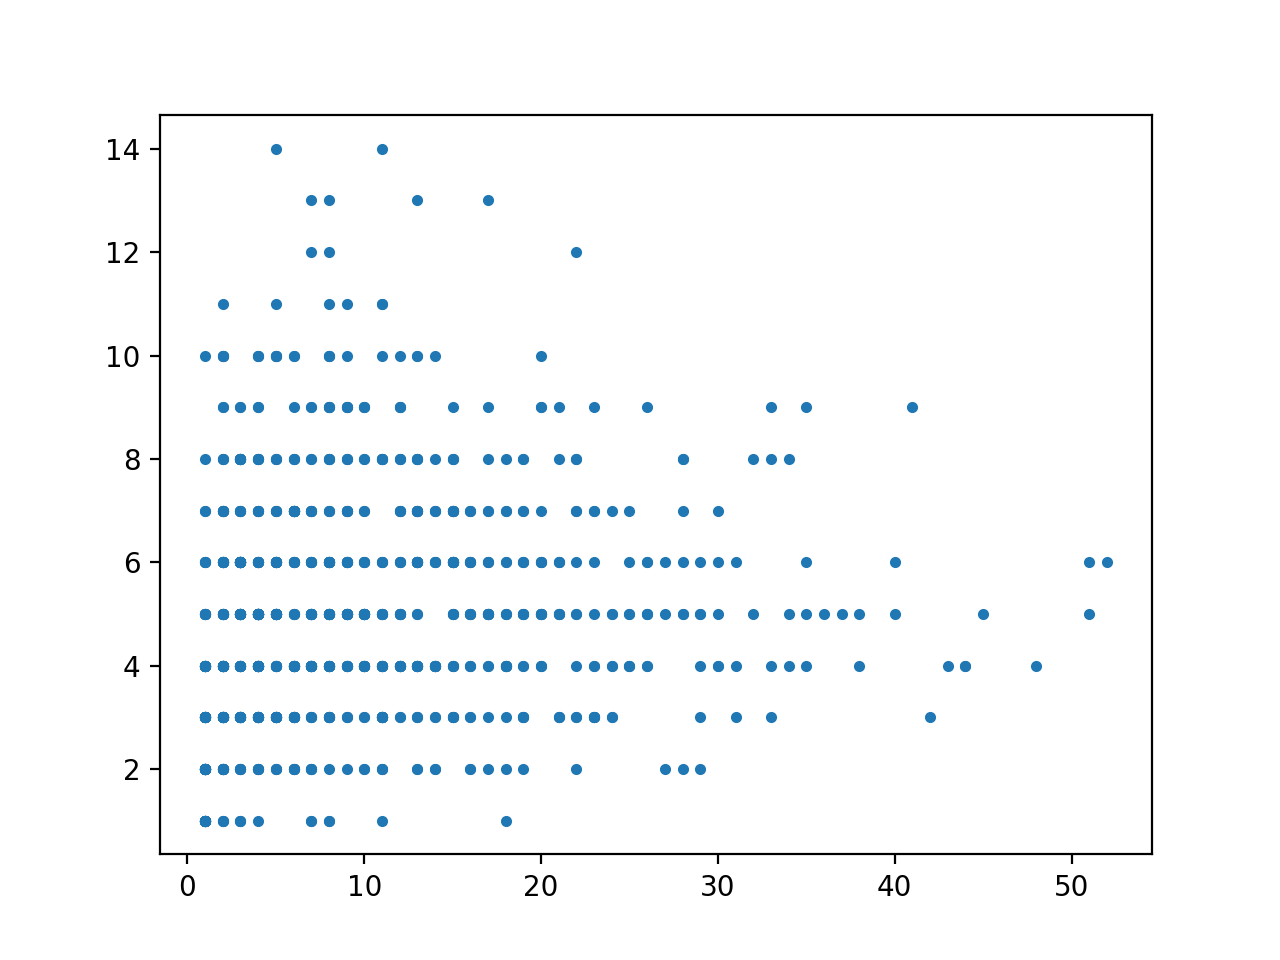

In [10]:
# Correlations based on hidden hmm fitting
lst = get_switch_times(world, agent).astype('float')
lst[lst == -1] = np.nan
nafterswitch = world.ntrialblocks[:-1] - lst
plt.figure()
plt.plot(nafterswitch[:-1], lst[1:], '.')

In [5]:
# Aggregate data
xarr = nafterswitch[:-1]
yarr = lst[1:]
order = np.argsort(xarr)
xsorted = xarr[order]
ysortbyX = yarr[order]

xvals, idx = np.unique(xsorted, return_index=True)
ysplit = np.split(ysortbyX, idx[1:])
# Mean of each split
means = []
stds = []
for elem in ysplit[1:]:
    means.append(np.nanmean(elem))
    stds.append(np.nanstd(elem) / np.sqrt(len(elem)))

<IPython.core.display.Javascript object>


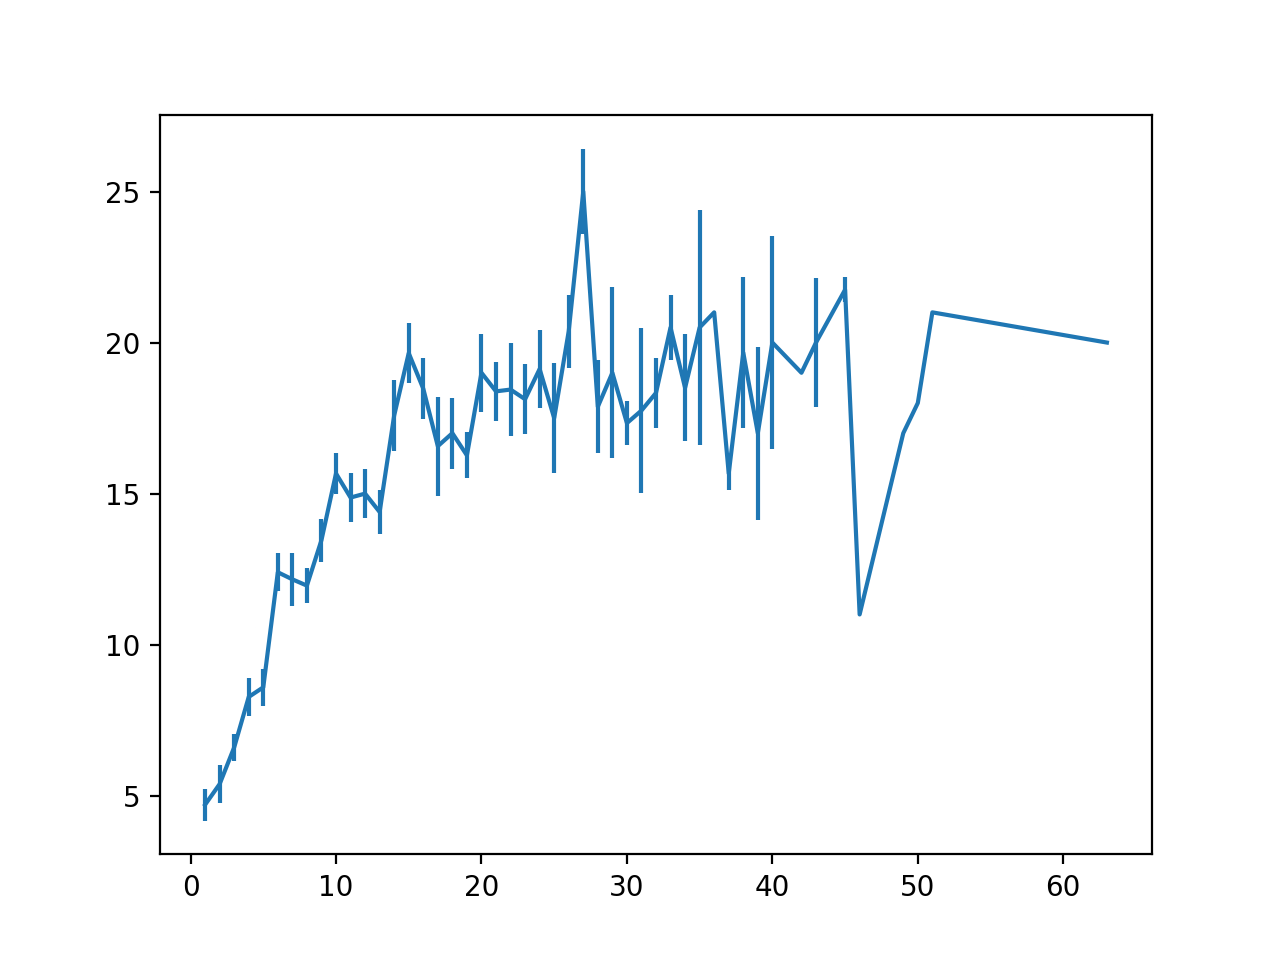

<ErrorbarContainer object of 3 artists>

In [108]:
plt.figure()
plt.errorbar(xvals[1:], means, stds)

<IPython.core.display.Javascript object>


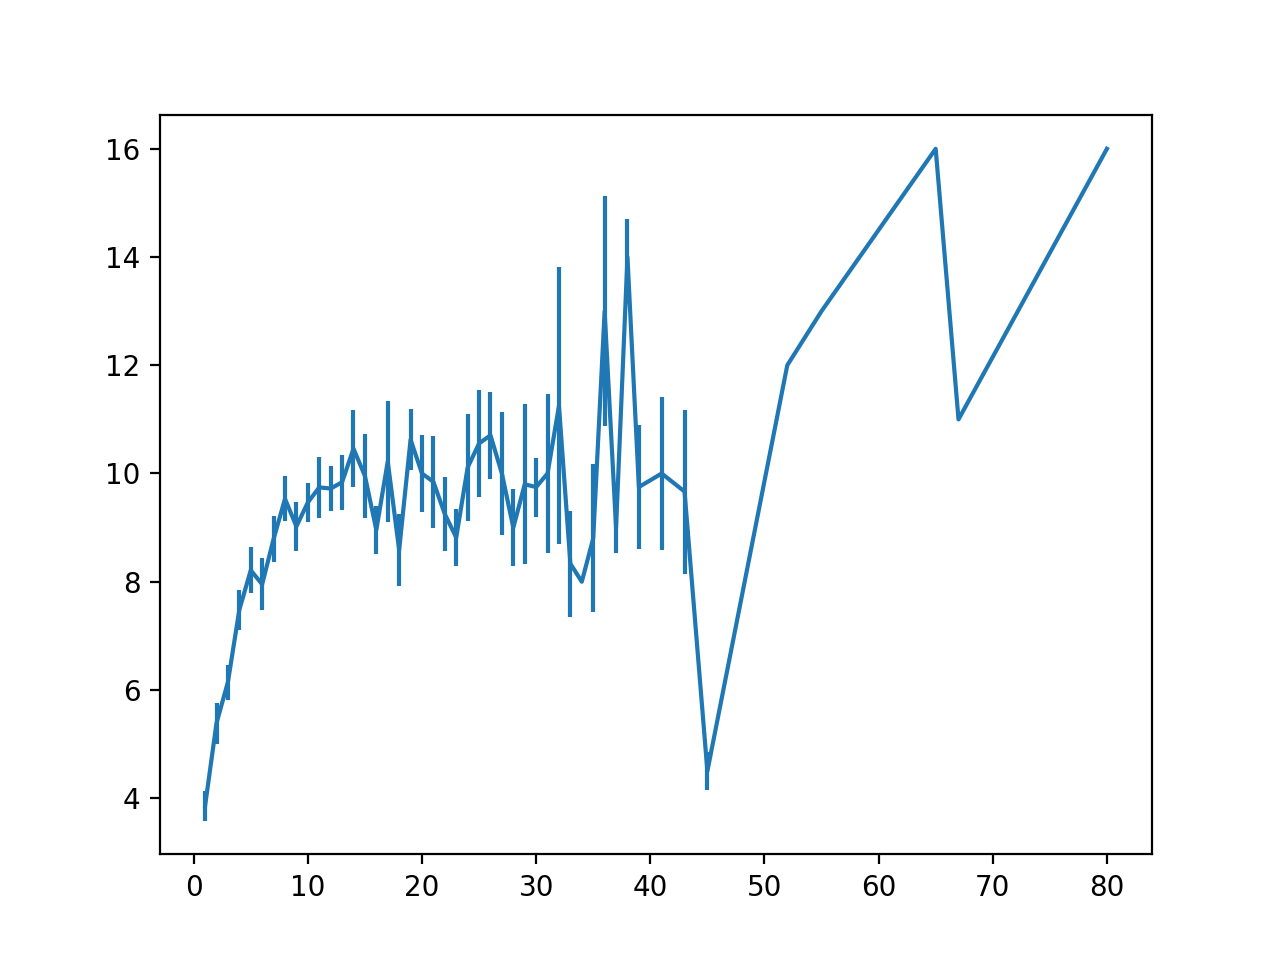

<ErrorbarContainer object of 3 artists>

In [113]:
plt.figure()
plt.errorbar(xvals[1:], means, stds)

In [87]:
a = np.arange(20)
np.split(a, [0,4,8])

[array([], dtype=int64),
 array([0, 1, 2, 3]),
 array([4, 5, 6, 7]),
 array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])]

<IPython.core.display.Javascript object>


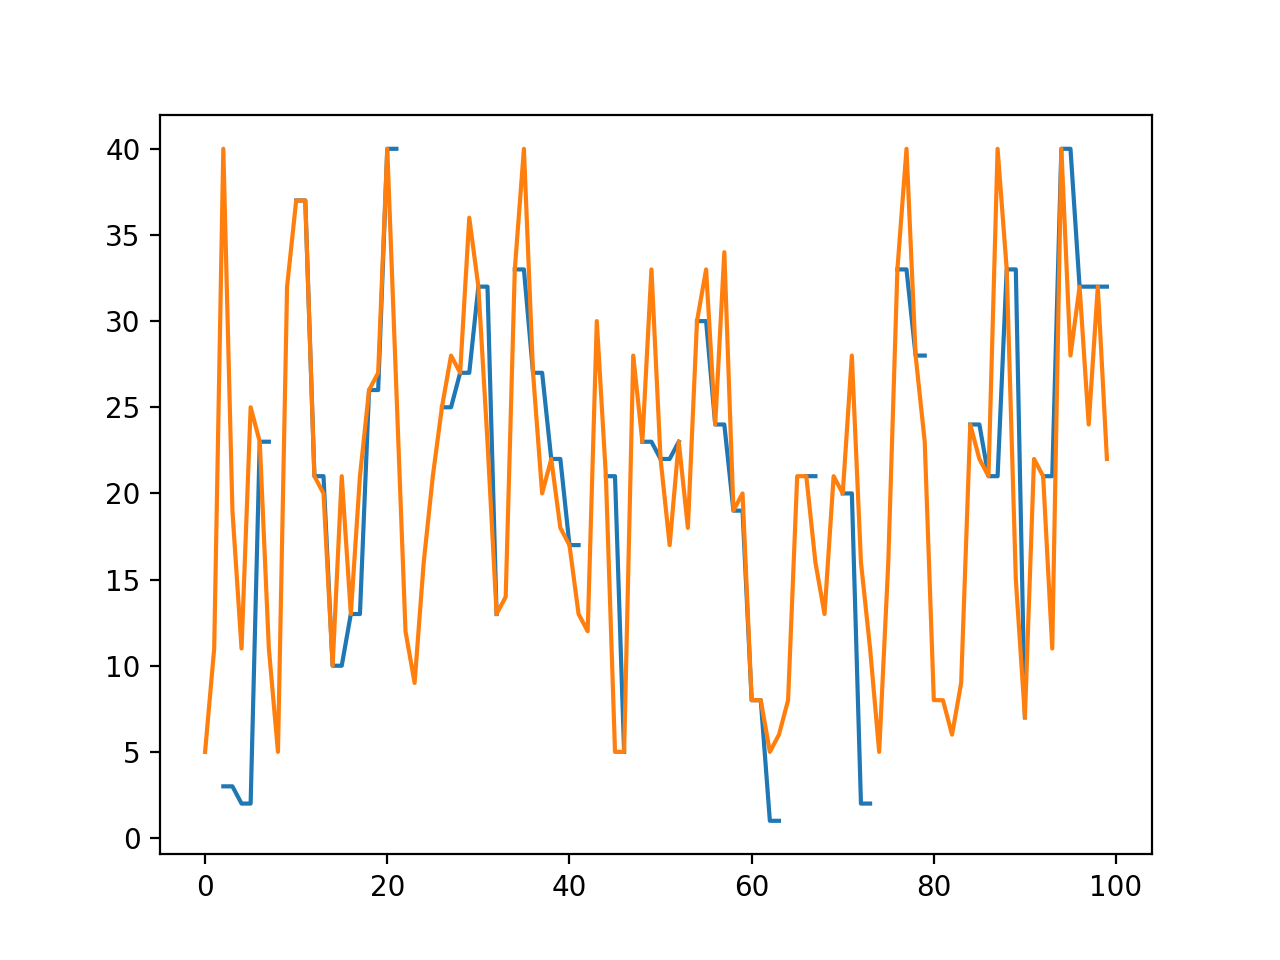

[]

In [7]:
plt.figure()
plt.plot(lst)
plt.plot(world.ntrialblocks[:-1])
plt.plot()

In [12]:
def simulate_rew_error_correlations(gamma):
    world = ForagingWorld(prew=0.9, psw=0.1, pstruct=[5, 100], nblockmax=1000)
    agent = ValueAccumulationAgent(gamma=gamma, beta=10)
    exp = Experiment(agent, world)
    exp.run()  

    choicelst = split_by_trials(agent.choice_history, world.ntrialblocks, chop='none')
    
    lst = get_switch_times(world, agent).astype('float')
    lst[lst == -1] = np.nan
    nafterswitch = world.ntrialblocks[:-1] - lst
    
    # Aggregate data
    xarr = nafterswitch[:-1]
    yarr = lst[1:]
    order = np.argsort(xarr)
    xsorted = xarr[order]
    ysortbyX = yarr[order]

    xvals, idx = np.unique(xsorted, return_index=True)
    ysplit = np.split(ysortbyX, idx[1:])
    # Mean of each split
    means = []
    stds = []
    for elem in ysplit[1:]:
        means.append(np.nanmean(elem))
        stds.append(np.nanstd(elem) / np.sqrt(len(elem)))
    
    return xvals[1:], means, stds, ysplit

In [14]:
ysplit

[array([ 3.,  4.,  7.,  1.,  4.,  1.,  2.,  3.,  3.,  4.,  3.,  3.,  4.,
         3.,  6.,  2.,  1.,  3.,  2.,  2.,  3.,  2.,  6.,  3.,  3.,  6.,
         6.,  2.,  5.,  5.,  4.,  4.,  2.,  4.,  4.,  4.,  4.,  6.,  2.,
         5.,  5.,  7.,  5.,  1.,  1.,  3.,  3.,  2.,  5.,  1.,  4.,  4.,
         4., nan,  2.,  1.,  6.,  4.,  6.,  3.]),
 array([ 4.,  7.,  6.,  3.,  8.,  4.,  2.,  4.,  1.,  4.,  2.,  6.,  3.,
         2.,  3.,  4.,  2.,  7.,  5.,  1.,  1.,  6.,  3., 11.,  6.,  3.,
         2.,  2.,  2.,  3.,  8.,  6.,  4.,  4.,  3.,  5., nan,  3.,  5.,
         3.,  7.,  4.,  2.,  9.,  7.,  1.,  5., nan,  2.,  4.,  7.,  6.,
        nan,  3.,  6.,  4.,  5.,  2.,  6.,  2.,  3.,  3.,  3.,  4., 10.,
         5.,  6.,  2.,  7.,  4.]),
 array([ 6.,  2.,  4.,  2.,  6.,  4.,  2.,  3.,  6.,  2.,  4.,  5.,  3.,
         2.,  5.,  3.,  5.,  4.,  3.,  6.,  2.,  7.,  5.,  3.,  4.,  5.,
         7.,  6.,  5.,  8.,  4.,  6.,  5.,  5.,  7.,  9.,  3.,  3.,  4.,
         2.,  8.,  3.,  2.,  5.,  4.,  

<IPython.core.display.Javascript object>


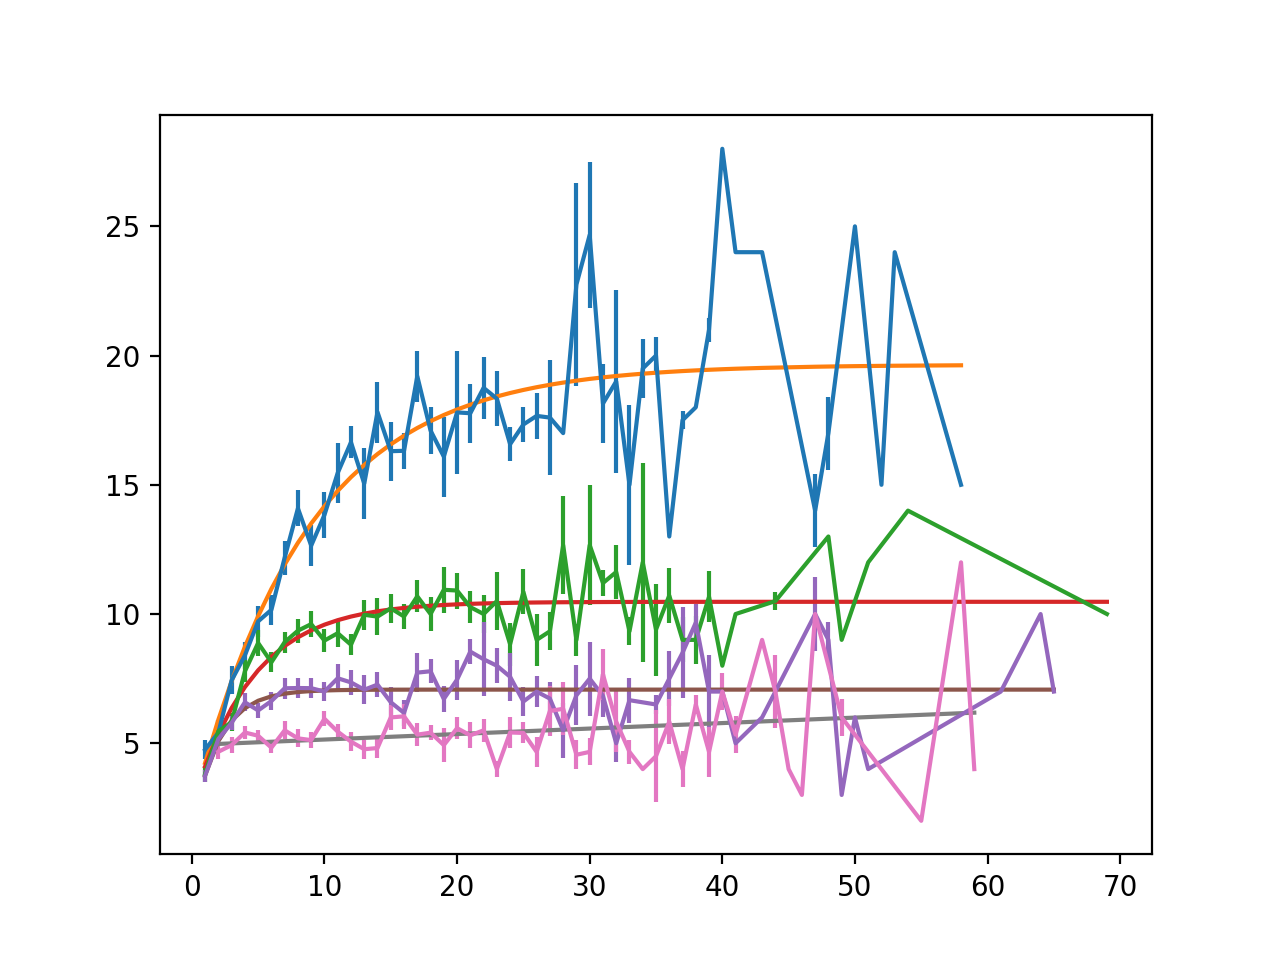

/Users/minhnhatle/opt/anaconda3/envs/default/lib/python3.9/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
<ipython-input-94-7df352262dc5>:10: RuntimeWarning: overflow encountered in square
  return np.sum((pred - y) ** 2)
/Users/minhnhatle/opt/anaconda3/envs/default/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/minhnhatle/opt/anaconda3/envs/default/lib/python3.9/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
<ipython-input-94-7df352262dc5>:10: RuntimeWarning: overflow encountered in square
  return np.sum((pred - y) ** 2)


In [96]:
gammalst = np.linspace(0.1, 1, 10)
plt.figure()
for gamma in [0.1, 0.2, 0.3, 0.4]:
    xvals, means, stds, ysplit = simulate_rew_error_correlations(gamma)
    params, ypred = fit_expfun([0.5, 4, 5], xvals, np.array(means))
    plt.errorbar(xvals, means, stds)
    plt.plot(xvals, ypred)

<IPython.core.display.Javascript object>


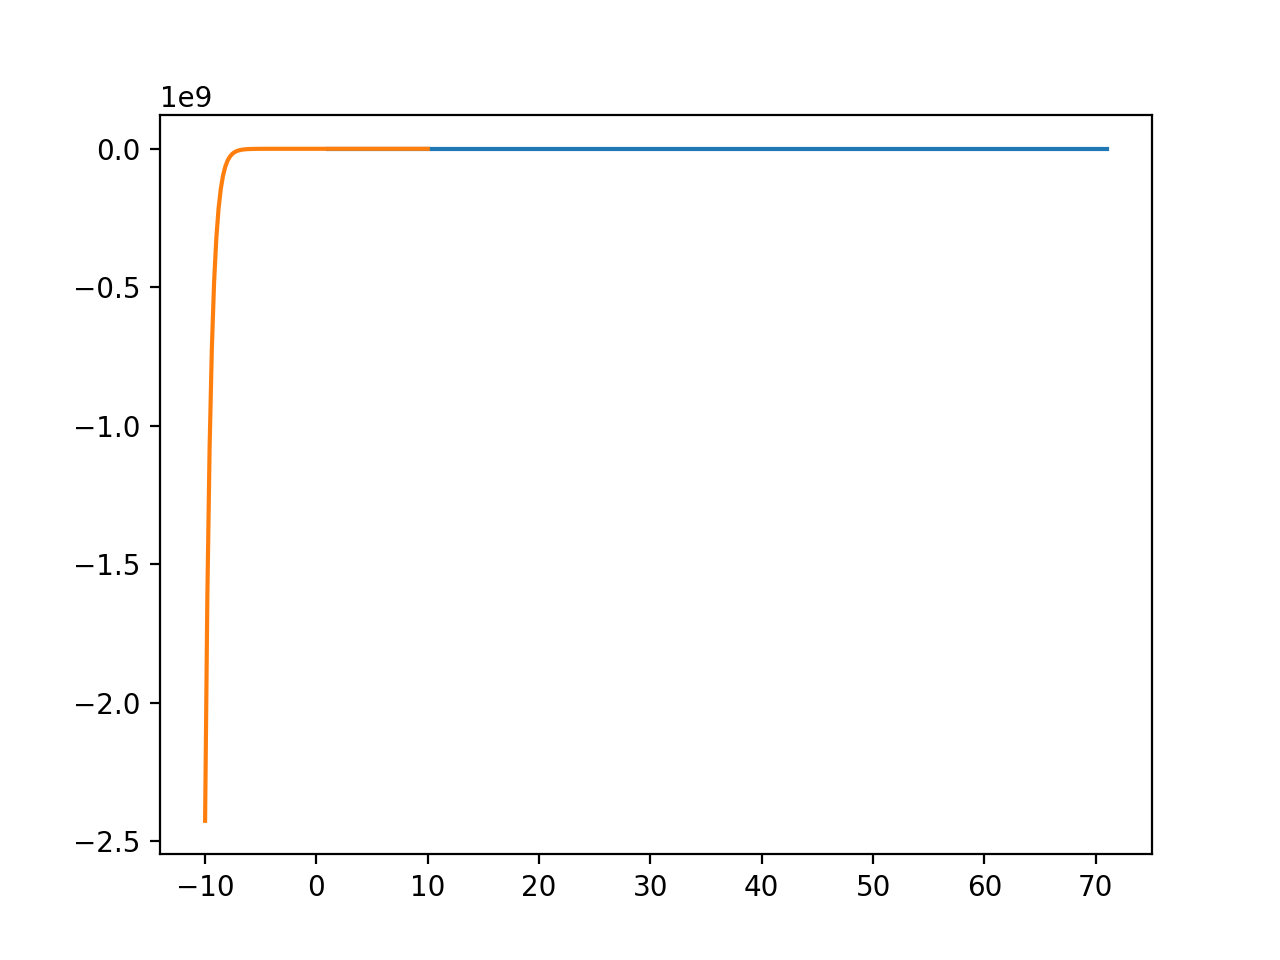

In [16]:
plt.figure()
plt.plot(xvals,means)

In [94]:
# Let's try to fit an exponential function to these data points
def exp_fun(x, params):
    alpha = params[0]
    beta = params[1]
    C = params[2]
    return C - beta * np.exp(-alpha * x)

def loss(params, x, y):
    pred = exp_fun(x, params)
    return np.sum((pred - y) ** 2)

def fit_expfun(params0, datax, datay):
    # Filter out nan's in datax and datay
    goody = datay[~np.isnan(datax)]
    goodx = datax[~np.isnan(datax)]
    
    result = scipy.optimize.minimize(loss, params0, (goodx, goody))
    params = result.x
    ypred = exp_fun(datax, params)
    return params, ypred



[0.42631844 2.89400055 5.6511533 ]


<IPython.core.display.Javascript object>


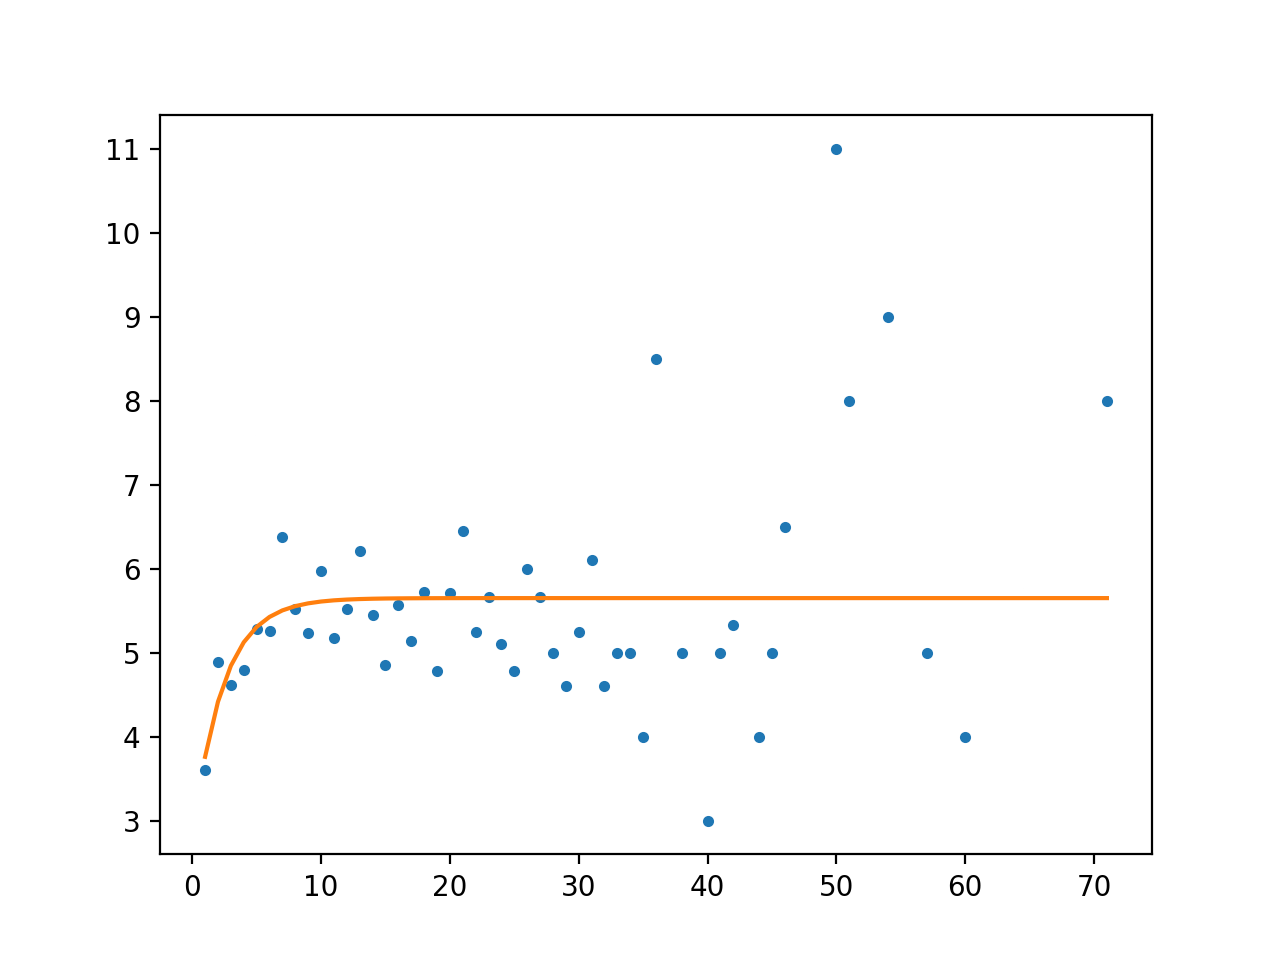

In [95]:
x= np.linspace(-2, 5, 100)
params0 = [1, 5, 10]
y = exp_fun(x, params0)
ynoise = y + np.random.randn(len(y)) * 1

params, ypred = fit_expfun([0.5, 4, 5], xvals, np.array(means))
print(params)

# print(loss(x, ynoise, 1, 5, 10))
plt.figure()
# plt.plot(x, y)
plt.plot(xvals, means, '.')
plt.plot(xvals, ypred)

In [69]:
params

array([0.5, 4. , 5. ])

[0.5 4.  1. ]


<IPython.core.display.Javascript object>


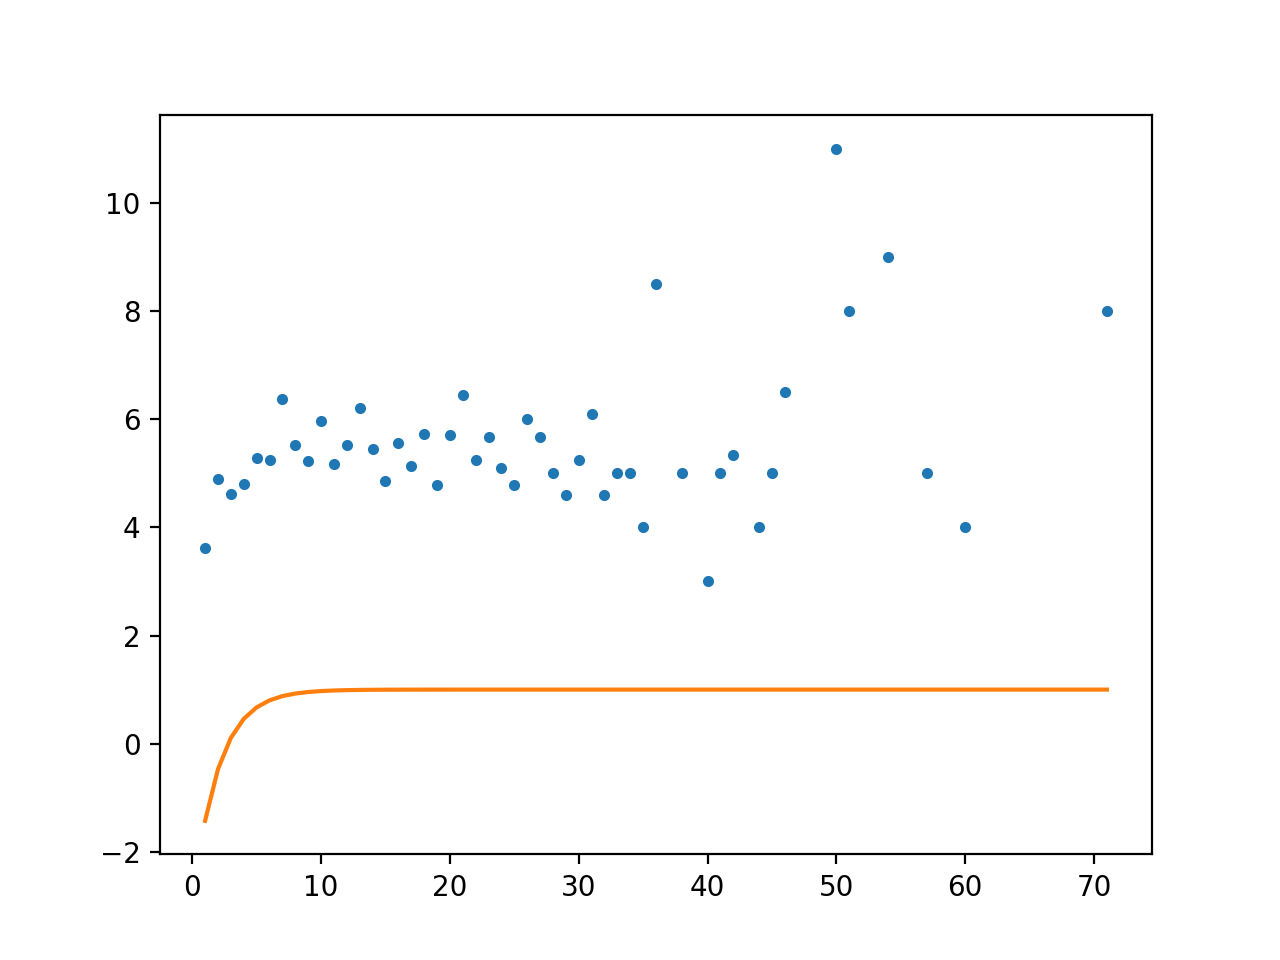

In [72]:
params, ypred = fit_expfun([0.5, 4, 1], xvals, means)
print(params)
# print(loss(x, ynoise, 1, 5, 10))
plt.figure()
# plt.plot(x, y)
plt.plot(xvals, means, '.')
plt.plot(xvals, ypred)

In [93]:
datax = xvals
datay = np.array(means)
goody = datay[~np.isnan(datax)]
goodx = datax[~np.isnan(datax)]

result = scipy.optimize.minimize(loss, params0, (datax, datay))